## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [5]:
X = np.linspace(0, 19).round(2)
y = np.array([-2*x+1 for x in X]).round(2)
BATCH_SIZE=16

In [ ]:
y

In [ ]:
data = np.append(X.reshape(-1,1), y.reshape(-1,1), axis=1)

**Helper functions** 

In [8]:
def divide_data(X,y, batch_size):
  chunks = X.shape[0] // batch_size
  X_new = np.array(np.array_split(X, chunks))
  y_new = np.array(np.array_split(y, chunks))
  return X_new, y_new

def predict(X, theta_0, theta_1):
  y_predicted = [(theta_0 + theta_1*point) for point in X]
  return y_predicted

def plot_loss_epochs(loss, epochs):
  plt.plot(np.arange(epochs), list(loss))
  plt.show()

def plot_regression_line(x, y, h_list):
  for h in h_list :
    plt.scatter(X,y)
    plt.plot(X, h)
    plt.xlabel('x')
    plt.ylabel('y')
  plt.show()

def plot_thetas_loss(thetas_0, thetas_1, loss):
  plt.plot(thetas_0, list(loss))
  plt.xlabel('thetas_0')
  plt.ylabel('loss')
  plt.show()
  plt.plot(thetas_1, list(loss))
  plt.xlabel('thetas_1')
  plt.ylabel('loss')
  plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [ ]:
def full_batch_gd(X, y, LEARNING_RATE, iterations):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)
    temp_theta_0 = theta_0 - (LEARNING_RATE * (np.sum(distance)/array_length))
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
    temp_theta_1 = theta_1 - (LEARNING_RATE * (np.sum(theta_1_cost)/array_length))
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

#### Try your function with any input parameterss of your choice.

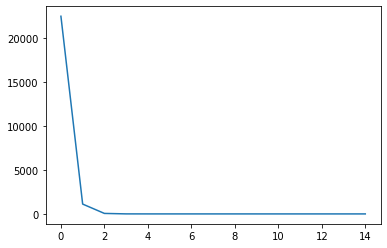

In [ ]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = full_batch_gd(X,y,0.01,15)
y_predicted = predict(X, new_theta_0, new_theta_1)
r2_score(y, y_predicted)
plot_loss_epochs(loss_list, 15)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

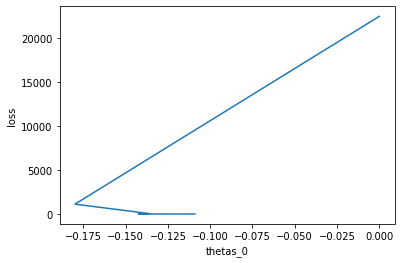

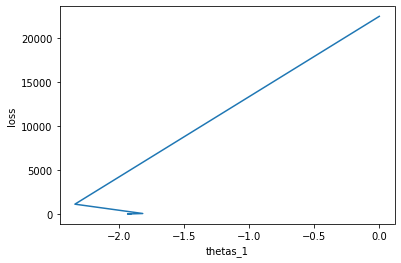

In [ ]:
plot_thetas_loss(thetas_0, thetas_1, loss_list)

#### Plot all regression lines till converge

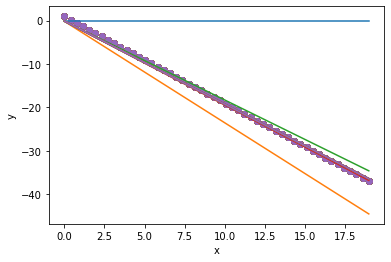

In [ ]:
plot_regression_line(X,y, new_y)

#### Plot the best regression line

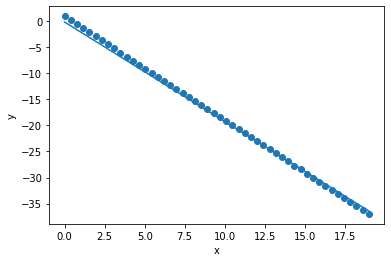

In [ ]:
plot_regression_line(X,y, list([y_predicted]))

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

at 30 , 0.005
-114361216736.21863


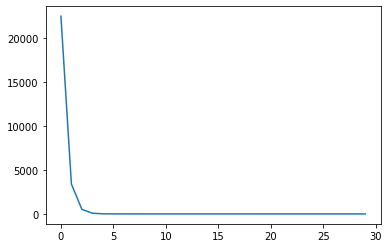

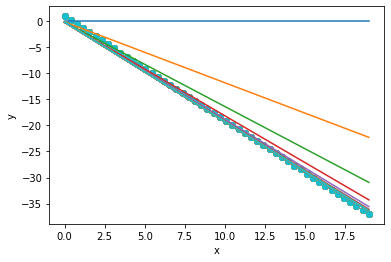

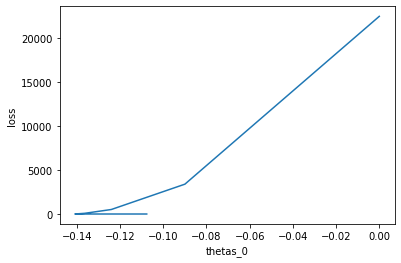

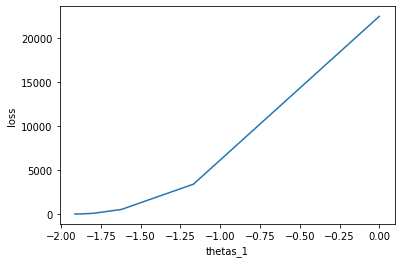

at 20 , 0.01
0.997483059246916


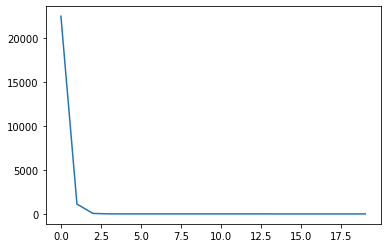

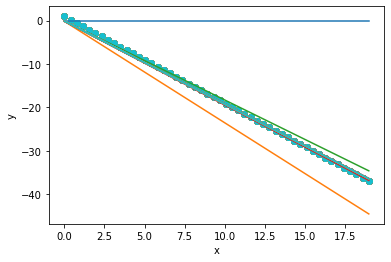

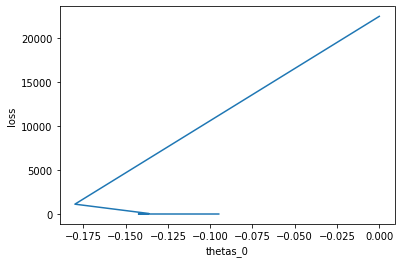

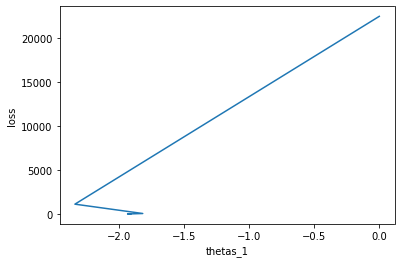

at 15 , 0.025
0.9975468727289575


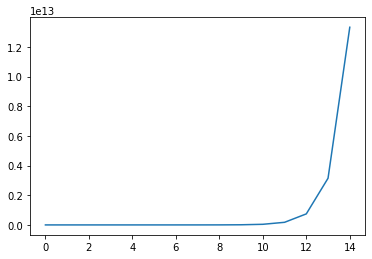

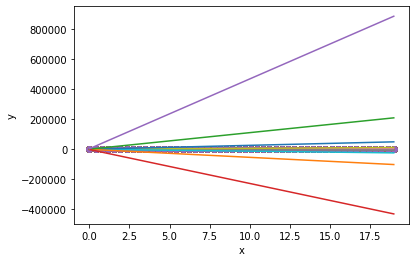

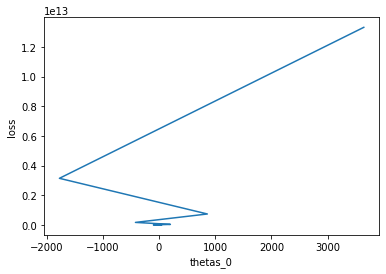

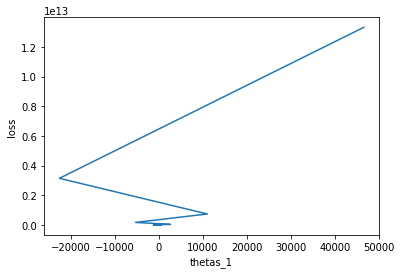

at 10 , 0.05
-9012015981.63768


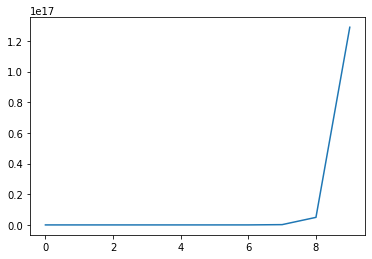

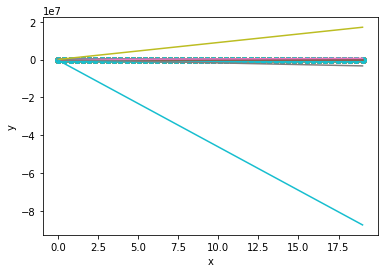

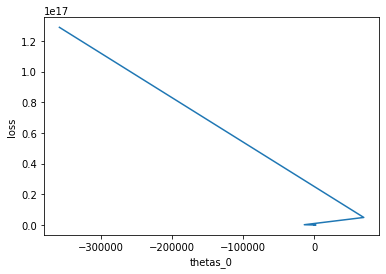

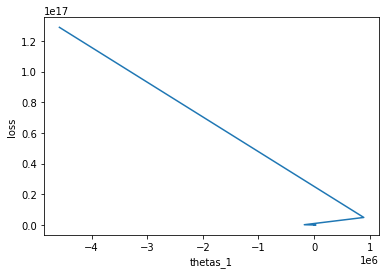

at 5 , 0.1
-538828015213357.75


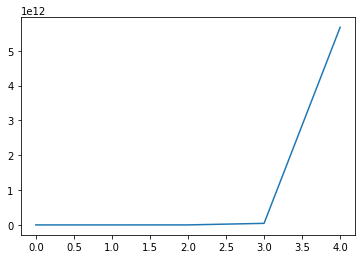

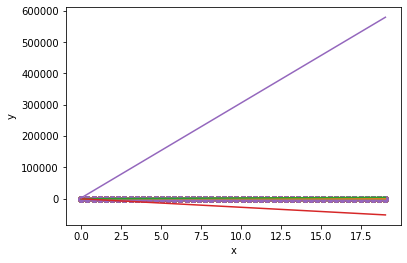

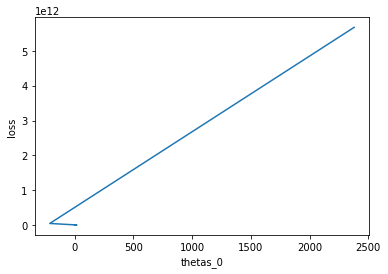

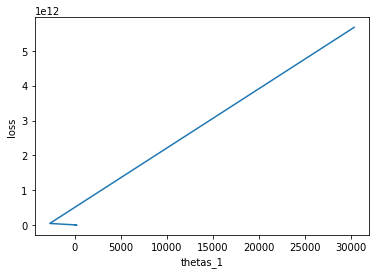

In [ ]:
learning_rates = [0.005, 0.01, 0.025, 0.05, 0.1]
iterations = [30, 20, 15, 10, 5]
for itr, lr in zip(iterations, learning_rates):
  print(f'at {itr} , {lr}')
  new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = full_batch_gd(X,y,lr,itr)
  print(r2_score(y, y_predicted))
  y_predicted = predict(X, new_theta_0, new_theta_1)
  plot_loss_epochs(loss_list, itr)
  plot_regression_line(X,y, new_y)
  plot_thetas_loss(thetas_0, thetas_1, loss_list)

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [ ]:
X_chunked,y_chunked = divide_data(X,y, BATCH_SIZE)

In [ ]:
def mini_batch_gd(X_batched, y_batched, LEARNING_RATE, iterations):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  for i in range(iterations):
    for X,y in zip(X_batched, y_batched):
      array_length = X.size
      y_predicted = [(theta_0 + theta_1*point) for point in X ]
      distance = y_predicted - y
      squared_distance = [value**2 for value in distance]
      loss = np.sum(squared_distance)
      cost = loss/(2*array_length)
      temp_theta_0 = theta_0 - (LEARNING_RATE * (np.sum(distance)/array_length))
      theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
      temp_theta_1 = theta_1 - (LEARNING_RATE * (np.sum(theta_1_cost)/array_length))
      theta_0 = temp_theta_0
      theta_1 = temp_theta_1
    losses.append(loss)
    y_preds.append(y_predicted)
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
  return theta_0, theta_1,losses, y_preds, theta_0_list, theta_1_list

In [ ]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1= mini_batch_gd(X_chunked, y_chunked, 0.01, 15)
y_predicted = predict(X, new_theta_0, new_theta_1)
r2_score(y, y_predicted)

0.991517338248352

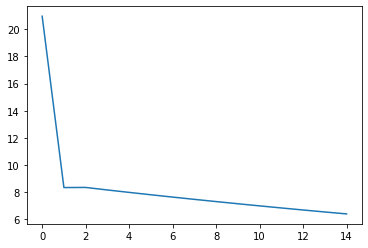

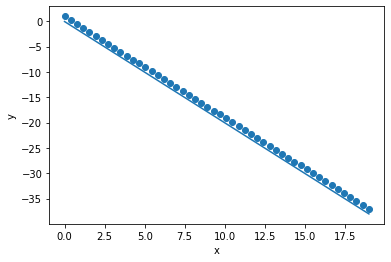

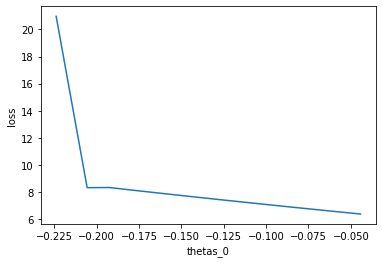

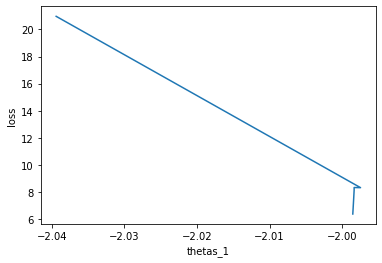

In [ ]:
plot_loss_epochs(loss_list, 15)
plot_regression_line(X,y, list([y_predicted]))
plot_thetas_loss(thetas_0, thetas_1, loss_list)

## Stochastic GD

In [6]:
def sgd(X, y, iterations, LEARNING_RATE):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  array_length = X.size
  for i in range(iterations):
    t_0 = theta_0
    t_1 = theta_1
    #print(t_0)
    for point_ind in range(X.size):
      y_predicted = theta_0 + theta_1*X[point_ind]
      distance = y_predicted - y[point_ind]
      squared_distance = distance**2
      cost = (squared_distance)/(2*array_length)
      temp_theta_0 = theta_0 - (LEARNING_RATE * distance)
      temp_theta_1 = theta_1 - (LEARNING_RATE * distance * X[point_ind])
      theta_0 = temp_theta_0
      theta_1 = temp_theta_1
    losses.append(squared_distance)
    y_preds.append(y_predicted)
    theta_0_list.append(t_0)
    theta_1_list.append(t_1)
  return theta_0, theta_1,losses, y_preds, theta_0_list, theta_1_list

In [9]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = sgd(X, y, 15, 0.01)
y_predicted = predict(X, new_theta_0, new_theta_1)
r2_score(y_predicted, y)

0.9971237454963693

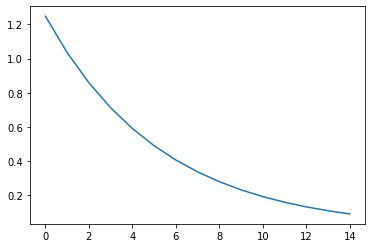

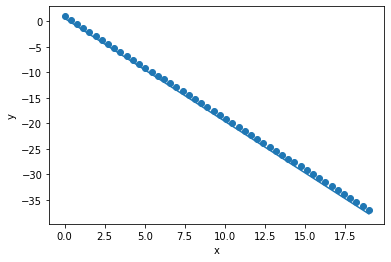

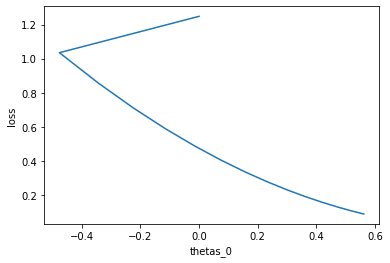

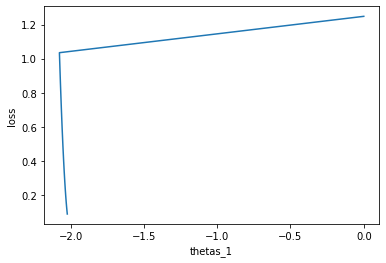

In [10]:
plot_loss_epochs(loss_list, 15)
plot_regression_line(X,y, list([y_predicted]))
plot_thetas_loss(thetas_0, thetas_1, loss_list)